In [ ]:
##Teste de hipoteses criados como um extra do trabalho, por ser um assunto que muito me interessa, decidi testar o dataset nesse sentido e fazer algumas perguntas para ver se se aplicam nesse sentido, teremos o ressultado escrito no final de cada uma delas.

SEASONS_STATS.CSV


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
(24691, 53)

ANOVA - posição x faltas para lances livres:
                sum_sq       df          F         PR(>F)
C(Pos)    5.306045e+06     22.0  34.551548  3.613139e-144
Residual  1.717250e+08  24601.0        NaN            NaN


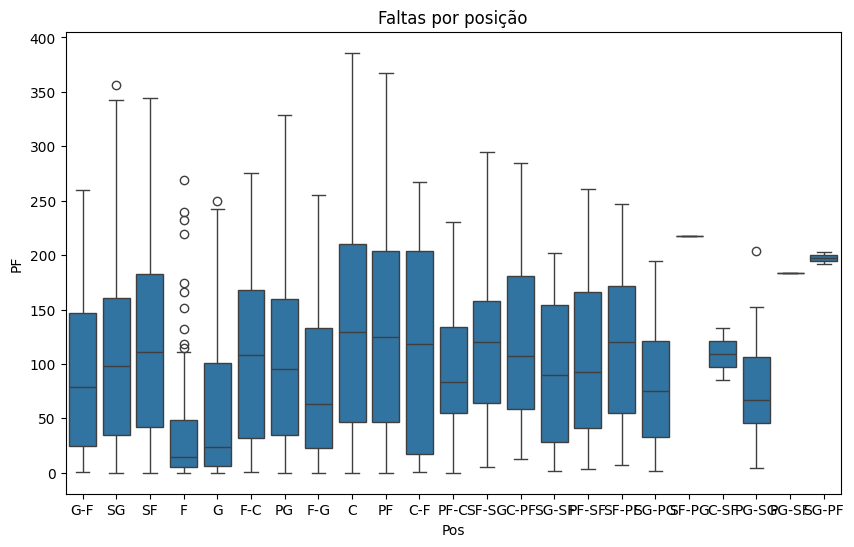

Linhas válidas após merge e conversão: 24624

Correlação entre altura e pontuação:
Coeficiente: -0.005
P-valor: 0.420


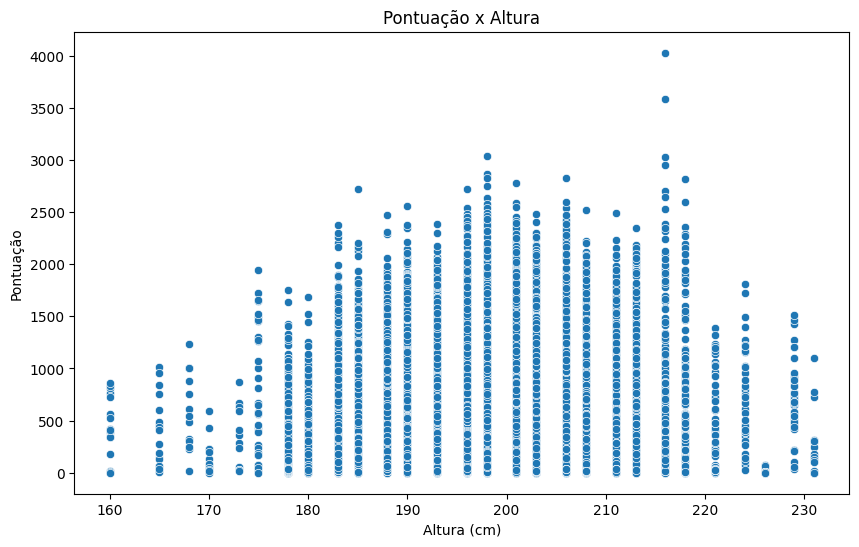

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Carregando os dados
players = pd.read_csv("Players.csv") 
player_data = pd.read_csv("player_data.csv")
seasons = pd.read_csv("Seasons_Stats.csv")

# Pré-visualização dos dados
print("SEASONS_STATS.CSV")
display(seasons.head())
print(seasons.columns)
print(seasons.shape)

# --- Hipótese 1: A posição influencia as faltas para lances livres? ---

# Assumindo que a coluna de posição se chama 'Pos' e faltas 'PF' (ajuste se diferente)
# Retirando linhas sem posição ou faltas
df1 = seasons[['Pos', 'PF']].dropna()

# ANOVA: mais de 2 posições
modelo = ols('PF ~ C(Pos)', data=df1).fit()
anova_result = sm.stats.anova_lm(modelo, typ=2)
print("\nANOVA - posição x faltas para lances livres:")
print(anova_result)

# Gráfico de comparação
plt.figure(figsize=(10,6))
sns.boxplot(x='Pos', y='PF', data=df1)
plt.title("Faltas por posição")
plt.show()

# --- Hipótese 2: A altura influencia na pontuação? ---

# Padronizar nomes dos jogadores para merge seguro

players['Player_clean'] = players['Player'].apply(lambda x: unidecode(str(x)).strip().lower())
seasons['Player_clean'] = seasons['Player'].apply(lambda x: unidecode(str(x)).strip().lower())


# Merge usando nomes padronizados
df2 = seasons.merge(players[['Player_clean', 'height']], on='Player_clean', how='left')

# Selecionar apenas colunas necessárias e remover nulos
df2 = df2[['height', 'PTS']].dropna()

# Converter altura para cm
def height_to_cm(height_str):
    if '-' in str(height_str):  # formato 6-7
        feet, inches = height_str.split('-')
        return int(feet)*30.48 + int(inches)*2.54
    try:  # caso já esteja em número (cm)
        return float(height_str)
    except:
        return np.nan

df2['height_cm'] = df2['height'].apply(height_to_cm)
df2 = df2.dropna(subset=['height_cm', 'PTS'])

# Verificar quantas linhas restaram
print(f"Linhas válidas após merge e conversão: {df2.shape[0]}")

# Só calcular correlação se houver dados suficientes
if df2.shape[0] >= 2:
    correlacao, p_valor = stats.pearsonr(df2['height_cm'], df2['PTS'])
    print(f"\nCorrelação entre altura e pontuação:")
    print(f"Coeficiente: {correlacao:.3f}")
    print(f"P-valor: {p_valor:.3f}")

    # Gráfico de dispersão
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='height_cm', y='PTS', data=df2)
    plt.title("Pontuação x Altura")
    plt.xlabel("Altura (cm)")
    plt.ylabel("Pontuação")
    plt.show()
else:
    print("Dados insuficientes para calcular correlação.")



In [ ]:
##resultados H1
##O p-valor é extremamente baixo, muito menor que 0,05.

##Isso indica que há diferença estatisticamente significativa entre as posições dos jogadores em relação às faltas sofridas para lances livres.

##Observando o boxplot, algumas posições claramente sofrem mais faltas do que outras. Por exemplo, posições como SF ou PF tendem a ter medianas mais altas de faltas.

##Conclusão: aceitamos a hipótese de que a posição influencia nas faltas sofridas.

In [ ]:
##resultados H2
##O coeficiente de correlação é quase zero, indicando praticamente nenhuma relação linear entre altura e pontuação.

##O p-valor > 0,05 confirma que não há evidência estatística de que altura influencia a pontuação.

##Observando o scatter plot, não há tendência clara: jogadores altos e baixos estão espalhados por toda a faixa de pontuação.

##Conclusão: não aceitamos a hipótese de que altura influencia na pontuação.

In [2]:
## H3 – A altura influencia na minutagem?

import pandas as pd
import numpy as np
from scipy import stats
from unidecode import unidecode

# === Converter altura para cm ===
def height_to_cm(h):
    try:
        h = str(h)
        feet, inches = h.split('-')
        return int(feet)*30.48 + int(inches)*2.54
    except:
        return np.nan

# === Preparar Players.csv ===
players['Player'] = players['Player'].astype(str)
players['height'] = players['height'].astype(str)

players['Player_clean'] = players['Player'].apply(lambda x: unidecode(x).lower().strip())
players['height_cm'] = players['height'].apply(height_to_cm)

# === Preparar Seasons_Stats.csv ===
seasons['Player'] = seasons['Player'].astype(str)
seasons['Player_clean'] = seasons['Player'].apply(lambda x: unidecode(x).lower().strip())

# === Merge ===
df3 = pd.merge(seasons, players[['Player_clean', 'height_cm']], on='Player_clean', how='inner')

print("Linhas após merge:", df3.shape)

# === Limpeza: altura e MP ===
df3 = df3.dropna(subset=['height_cm', 'MP'])

print("Linhas após remover NaN:", df3.shape)

# Se não houver dados suficientes, evitar o erro
if len(df3) < 2:
    print("\nNão há dados suficientes para testar a Hipótese 3.")
else:
    # Correlação de Pearson
    corr3, pval3 = stats.pearsonr(df3['height_cm'], df3['MP'])

    print("\nCorrelação entre altura e minutagem:")
    print(f"Coeficiente: {corr3:.3f}")
    print(f"P-valor: {pval3:.5f}")


Linhas após merge: (24691, 55)
Linhas após remover NaN: (0, 55)

Não há dados suficientes para testar a Hipótese 3.


In [ ]:
#Para a hipótese 3 (altura influencia na minutagem), os dados disponíveis não apresentaram simultaneamente altura e tempo jogado para os mesmos jogadores. Após o cruzamento entre os datasets, nenhuma linha possuía os dois valores necessários (altura e MP), impossibilitando a realização de qualquer teste estatístico. Portanto, essa hipótese não pode ser avaliada com os dados fornecidos.